In [1]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **데이터 로드 (2024년)**

In [4]:
df2024 = pd.read_excel("/content/drive/MyDrive/관광공모전/data/sav/2024.xlsx")

In [5]:
df = df2024.copy()
df.head()

,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,...,D_SEX,D_AGE,D_MOK,D_NUM,D_GUB,weight1,weight2,weight3,weight4,weight
0,57,5,4회 이상,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식","한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서",NaN,NaN,NaN,...,여 성,50 대,여 가/위 락/ 휴 식,4 회 이 상,개 별 여 행,198.017146,NaN,NaN,NaN,198.017146
1,58,4,4회 이상,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식","한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서","한국의 가성비 높은 여행 상품(패키지, 항공권 등)을 접하고 나서",과거 방문 경험이 좋아서,일본,...,여 성,40 대,여 가/위 락/ 휴 식,4 회 이 상,개 별 여 행,784.278401,NaN,NaN,NaN,784.278401
2,59,3,3회,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식","한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서",과거 방문 경험이 좋아서,"한국 전통문화(한복, 한식 등 고유문화)를 접하고 나서",일본,...,여 성,30 대,여 가/위 락/ 휴 식,3 회,개 별 여 행,607.021269,NaN,NaN,NaN,607.021269
3,60,1,1회,NaN,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식","한국 전통문화(한복, 한식 등 고유문화)를 접하고 나서","한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서","한국에서 행사(가족행사, 스포츠 행사 등)가 있어서",NaN,...,남 성,20 대,여 가/위 락/ 휴 식,1 회,개 별 여 행,1049.500143,NaN,NaN,NaN,1049.500143
4,61,5,4회 이상,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식",과거 방문 경험이 좋아서,한국의 다양한 관광지 관련 정보를 접하고 나서,"한국의 가성비 높은 여행 상품(패키지, 항공권 등)을 접하고 나서",홍콩,...,여 성,20 대,여 가/위 락/ 휴 식,4 회 이 상,개 별 여 행,876.796936,NaN,NaN,NaN,876.796936


In [6]:
df['D_NAT'] = df['D_NAT'].str.replace(' ', '', regex=False)
df['D_AGE'] = df['D_AGE'].str.replace(' ', '', regex=False)

In [19]:
us_5060 = df[(df['D_NAT'] == '미국') & (df['D_AGE'].isin(['50대', '60대이상']))]
len(us_5060)

419

/tmp/ipython-input-17-343366214.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=area_visited_count, x='region_code', y='count', palette='crest')


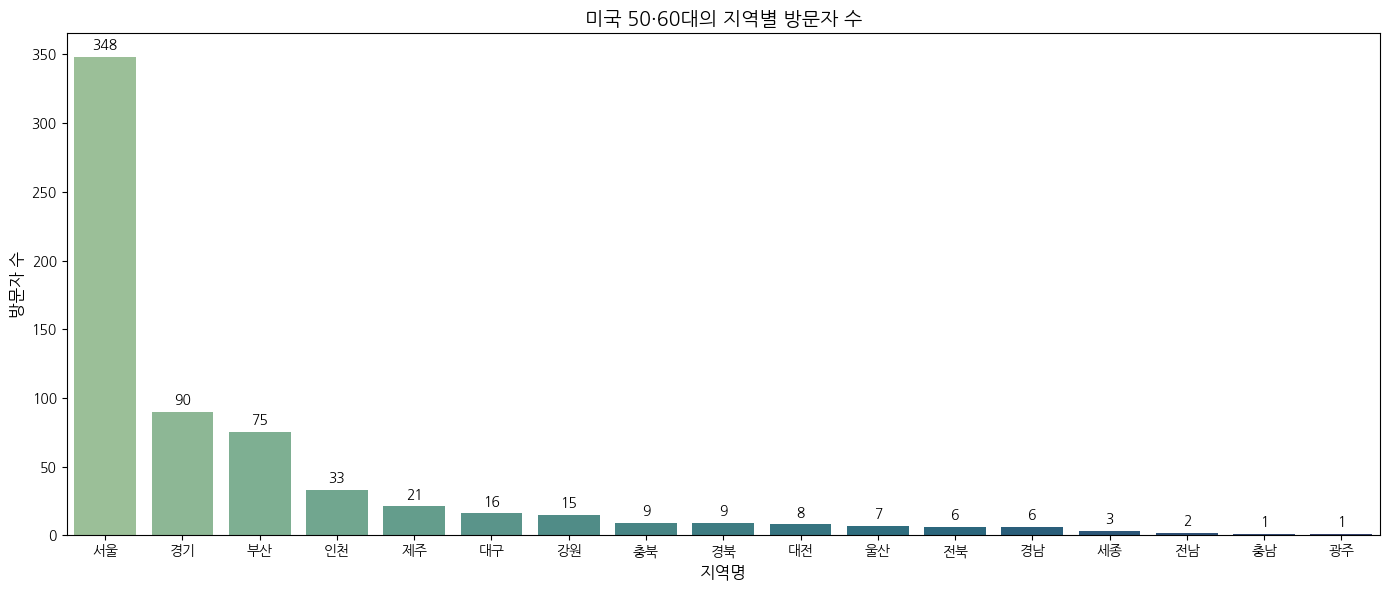

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 미국 50·60대 필터링
us_5060 = df[(df['D_NAT'] == '미국') & (df['D_AGE'].isin(['50대', '60대이상']))]

# 2. 지역 방문 컬럼 (Q9_2a01 ~ Q9_2a17)
q9_visit_cols = [f'Q9_2a{str(i).zfill(2)}' for i in range(1, 18)]
visit_area_df = us_5060[q9_visit_cols]

# 3. 스택 후 방문값만 집계
visit_area_long = visit_area_df.stack().dropna()
area_visited_count = visit_area_long.value_counts().reset_index()
area_visited_count.columns = ['region_code', 'count']

# 4. 내림차순 정렬
area_visited_count = area_visited_count.sort_values(by='count', ascending=False)

# 5. 시각화
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=area_visited_count, x='region_code', y='count', palette='crest')

# 6. 막대 위 숫자 표시
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(area_visited_count['count']) * 0.01,
        f'{int(height):,}',
        ha='center', va='bottom',
        fontsize=10
    )

# 7. 그래프 설정
plt.title('미국 50·60대의 지역별 방문자 수', fontsize=14)
plt.xlabel('지역명', fontsize=12)
plt.ylabel('방문자 수', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [21]:
df['D_SEX'] = df['D_SEX'].str.replace(' ', '', regex=False)

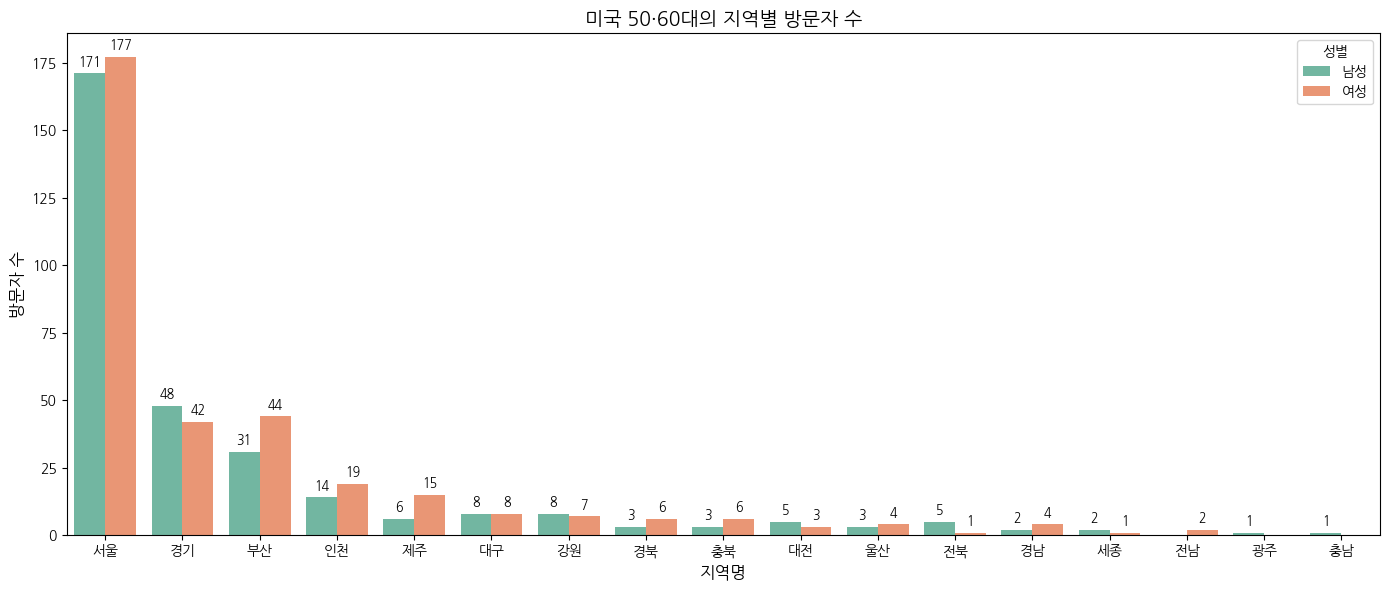

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 미국 50·60대 필터링
us_5060 = df[(df['D_NAT'] == '미국') & (df['D_AGE'].isin(['50대', '60대이상']))]

# 2. 지역 방문 컬럼
q9_visit_cols = [f'Q9_2a{str(i).zfill(2)}' for i in range(1, 18)]

# 3. 성별별 지역 방문자 수 수집
visit_counts = []

for gender in ['남성', '여성']:
    sub_df = us_5060[us_5060['D_SEX'] == gender]
    visit_area = sub_df[q9_visit_cols]
    stacked = visit_area.stack().dropna()
    counts = stacked.value_counts().reset_index()
    counts.columns = ['region_code', 'count']
    counts['gender'] = gender
    visit_counts.append(counts)

# 4. 병합
visit_counts_df = pd.concat(visit_counts)

# 5. 전체 합산 방문자 수 기준 정렬 순서 생성
region_order = (
    visit_counts_df
    .groupby('region_code')['count']
    .sum()
    .sort_values(ascending=False)
    .index.tolist()
)

# 6. 시각화
plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=visit_counts_df,
    x='region_code', y='count', hue='gender',
    order=region_order,  # ← 여기서 정렬 반영
    palette='Set2'
)

# 7. 막대 위 텍스트
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + max(visit_counts_df['count']) * 0.01,
            f'{int(height)}',
            ha='center', va='bottom',
            fontsize=9
        )

# 8. 기타 설정
plt.title('미국 50·60대의 지역별 방문자 수', fontsize=14)
plt.xlabel('지역명', fontsize=12)
plt.ylabel('방문자 수', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='성별')
plt.tight_layout()
plt.show()


### 방문 지역별 전반적 만족도 (방문자수 내림차순)

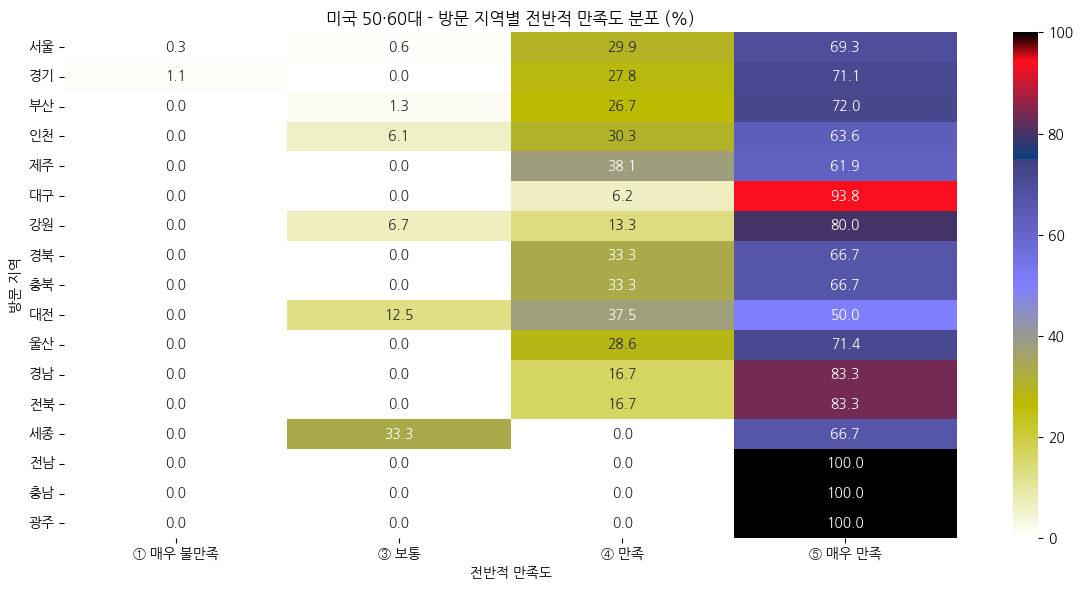

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 미국 50·60대 필터링
us_5060 = df[(df['D_NAT'] == '미국') & (df['D_AGE'].isin(['50대', '60대이상']))].copy()

# 2. 지역 컬럼 + Q11
q9_visit_cols = [f'Q9_2a{str(i).zfill(2)}' for i in range(1, 18)]
cols = q9_visit_cols + ['Q11']

# 3. melt로 긴 형태로 변환
visit_melt = us_5060[cols].melt(
    id_vars='Q11',
    value_vars=q9_visit_cols,
    var_name='visit_var',
    value_name='region_code'
)

# 4. 실제 방문한 지역만 필터링 (NaN 제외)
visit_melt = visit_melt.dropna(subset=['region_code'])

# ✅ 5. 방문자 수 기준 정렬 순서 만들기
visit_counts = visit_melt['region_code'].value_counts()
sorted_region_codes = visit_counts.index.tolist()  # 방문자 수 많은 순

# 6. 교차표 생성 (지역코드별 만족도 분포 비율, %)
cross_region_q11 = pd.crosstab(
    visit_melt['region_code'],
    visit_melt['Q11'],
    normalize='index'
) * 100

# ✅ 7. 정렬 순서 적용
cross_region_q11 = cross_region_q11.loc[sorted_region_codes]

# 8. 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(cross_region_q11, annot=True, fmt='.1f', cmap='gist_stern_r')
plt.title('미국 50·60대 - 방문 지역별 전반적 만족도 분포 (%)')
plt.xlabel('전반적 만족도')
plt.ylabel('방문 지역')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


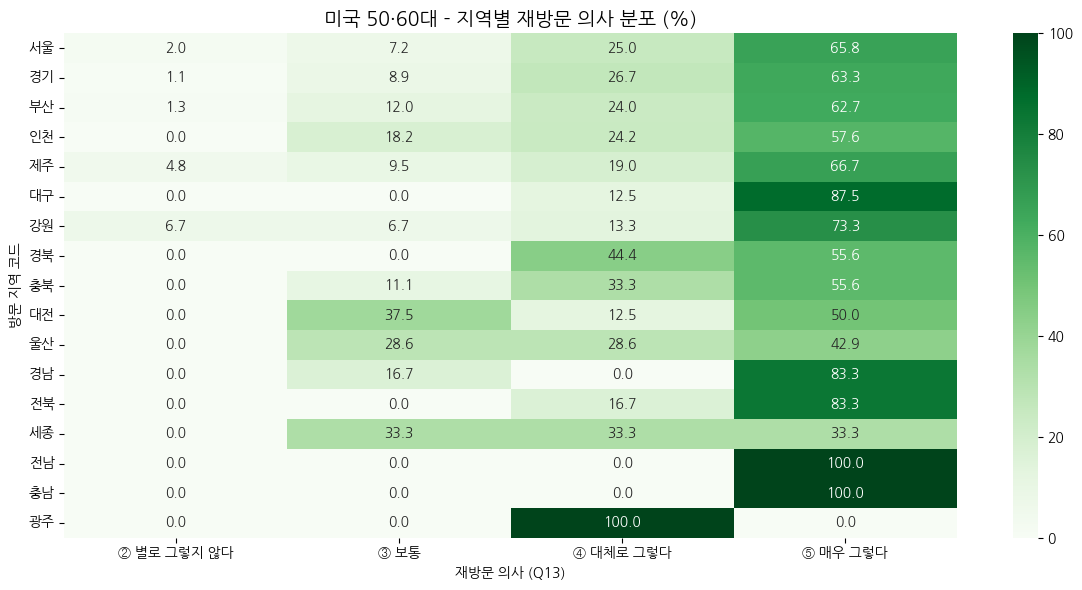

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 미국 50·60대 필터링
us_5060 = df[(df['D_NAT'] == '미국') & (df['D_AGE'].isin(['50대', '60대이상']))].copy()

# 2. 지역 컬럼 + Q13
q9_visit_cols = [f'Q9_2a{str(i).zfill(2)}' for i in range(1, 18)]
cols = q9_visit_cols + ['Q13']

# 3. melt로 긴 형태로 변환
visit_melt = us_5060[cols].melt(
    id_vars='Q13',
    value_vars=q9_visit_cols,
    var_name='visit_var',
    value_name='region_code'
)

# 4. 방문한 지역만 필터
visit_melt = visit_melt.dropna(subset=['region_code'])

# ✅ 5. 방문자 수 기준 지역 정렬
visit_counts = visit_melt['region_code'].value_counts()
sorted_region_codes = visit_counts.index.tolist()

# 6. 지역별 Q13(재방문 의사) 분포 교차표 (%)
cross_region_q13 = pd.crosstab(
    visit_melt['region_code'],
    visit_melt['Q13'],
    normalize='index'
) * 100

# 7. 지역 순서 정렬
cross_region_q13 = cross_region_q13.loc[sorted_region_codes]

# 8. 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(cross_region_q13, annot=True, fmt='.1f', cmap='Greens')
plt.title('미국 50·60대 - 지역별 재방문 의사 분포 (%)', fontsize=14)
plt.xlabel('재방문 의사 (Q13)')
plt.ylabel('방문 지역 코드')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


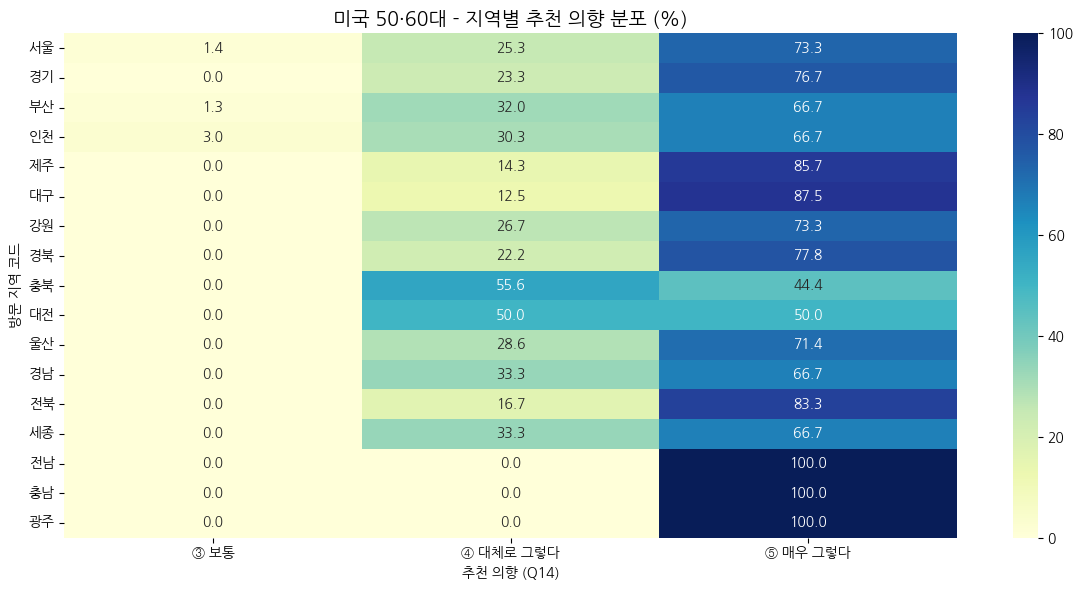

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 미국 50·60대 필터링
us_5060 = df[(df['D_NAT'] == '미국') & (df['D_AGE'].isin(['50대', '60대이상']))].copy()

# 2. 지역 컬럼 + Q14 (추천 의향)
q9_visit_cols = [f'Q9_2a{str(i).zfill(2)}' for i in range(1, 18)]
cols = q9_visit_cols + ['Q14']

# 3. melt로 긴 형태 변환
visit_melt = us_5060[cols].melt(
    id_vars='Q14',
    value_vars=q9_visit_cols,
    var_name='visit_var',
    value_name='region_code'
)

# 4. 실제 방문 지역만 필터링
visit_melt = visit_melt.dropna(subset=['region_code'])

# ✅ 5. 방문자 수 기준 지역 정렬
visit_counts = visit_melt['region_code'].value_counts()
sorted_region_codes = visit_counts.index.tolist()

# 6. 지역별 추천 의향(Q14) 분포 교차표 (%)
cross_region_q14 = pd.crosstab(
    visit_melt['region_code'],
    visit_melt['Q14'],
    normalize='index'
) * 100

# 7. 정렬된 순서 적용
cross_region_q14 = cross_region_q14.loc[sorted_region_codes]

# 8. 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(cross_region_q14, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('미국 50·60대 - 지역별 추천 의향 분포 (%)', fontsize=14)
plt.xlabel('추천 의향 (Q14)')
plt.ylabel('방문 지역 코드')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


/tmp/ipython-input-43-3702546455.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


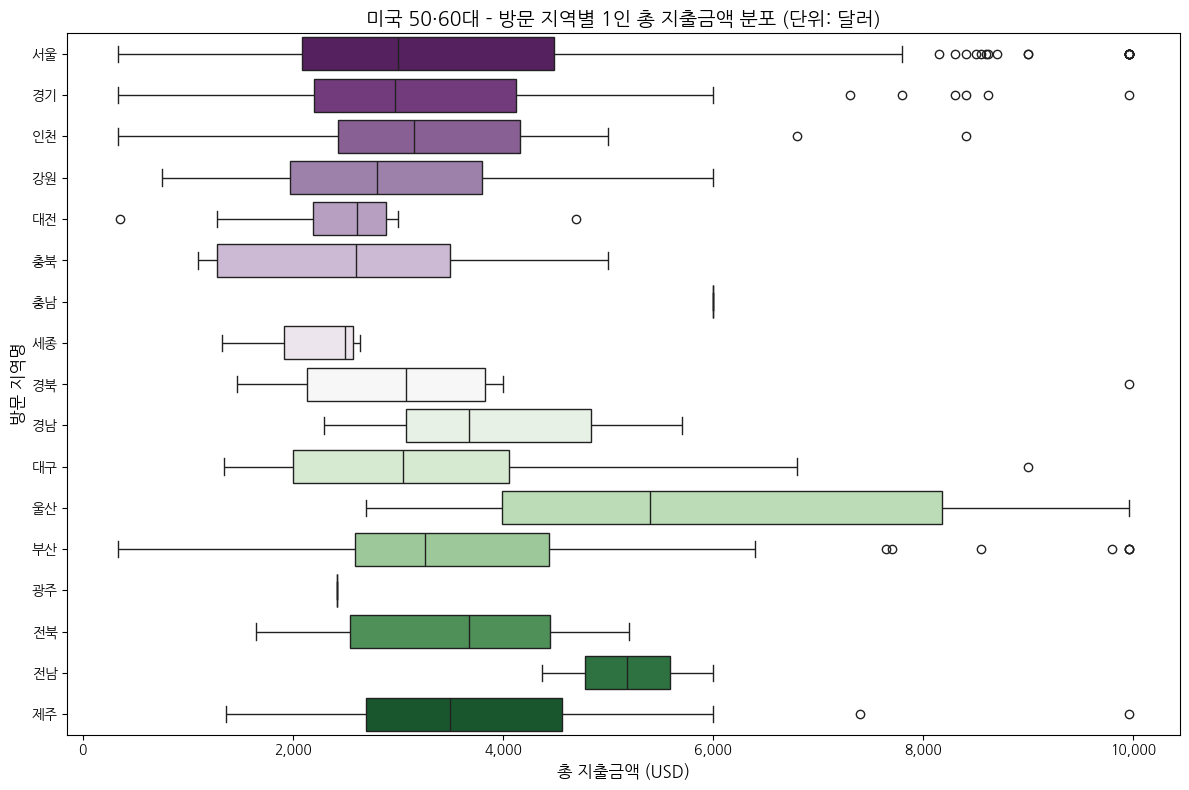

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import pandas as pd

# 1. 미국 50·60대 필터링
us_5060 = df[(df['D_NAT'] == '미국') & (df['D_AGE'].isin(['50대', '60대이상']))].copy()

# 2. 방문지역 컬럼 + 총 지출금액
q9_visit_cols = [col for col in df.columns if col.startswith('Q9_2a')]
plot_df = us_5060[q9_visit_cols + ['총액1인TOT2']]

# 3. melt → 긴 형태로 변환 (방문 지역 × 지출금액)
visit_melt = plot_df.melt(
    id_vars='총액1인TOT2',
    value_vars=q9_visit_cols,
    var_name='visit_var',
    value_name='region_name'
)

# 5. 박스플롯 (가로형)
plt.figure(figsize=(12, 8))
ax = sns.boxplot(
    data=visit_melt,
    y='region_name',
    x='총액1인TOT2',
    palette='PRGn'
)

# 6. 제목 및 라벨
ax.set_title('미국 50·60대 - 방문 지역별 1인 총 지출금액 분포 (단위: 달러)', fontsize=14)
ax.set_xlabel('총 지출금액 (USD)', fontsize=12)
ax.set_ylabel('방문 지역명', fontsize=12)

# 7. x축 콤마 포맷
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()


/tmp/ipython-input-49-1777174673.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


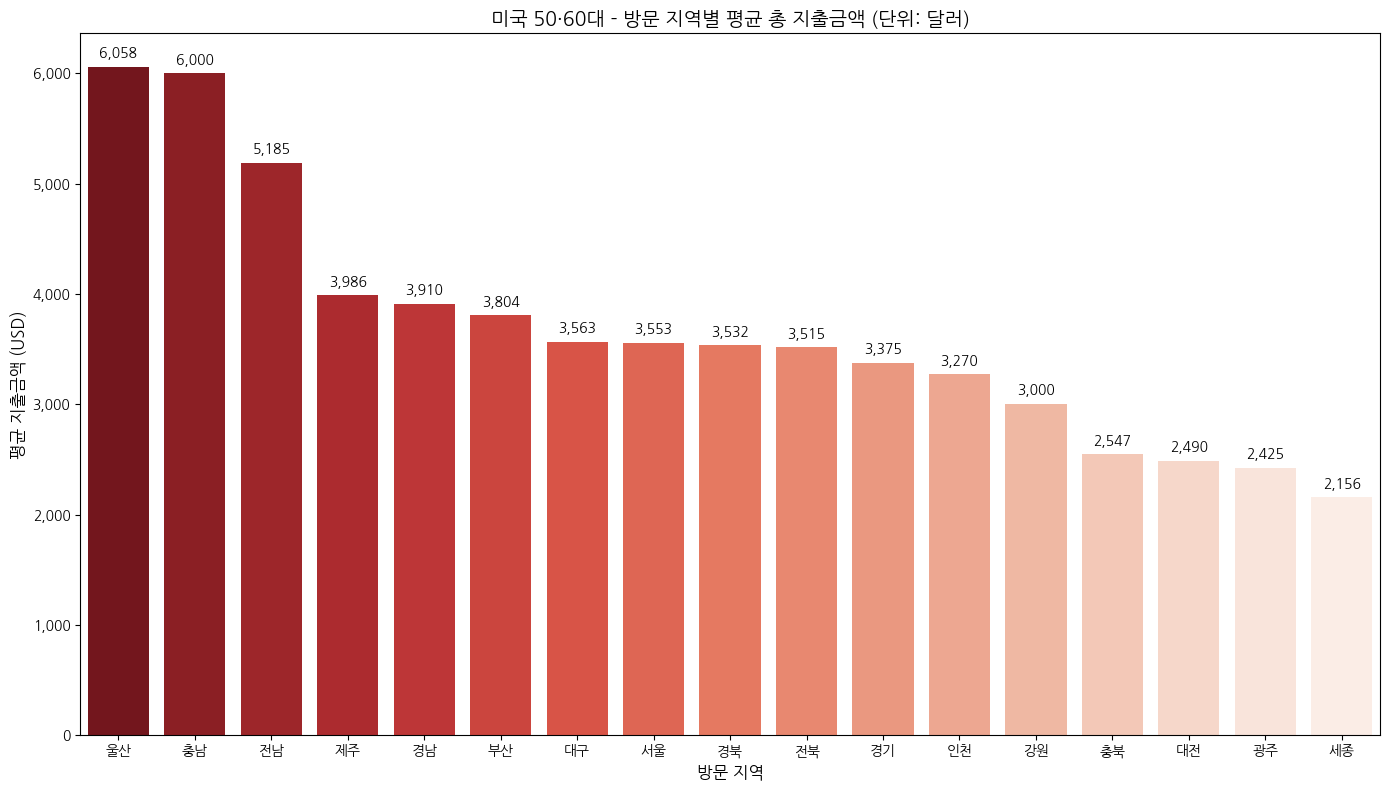

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import pandas as pd

# 1. 미국 5060 필터링
us_5060 = df[(df['D_NAT'] == '미국') & (df['D_AGE'].isin(['50대', '60대이상']))].copy()

# 2. 지역 컬럼 + 총지출금액
q9_visit_cols = [col for col in df.columns if col.startswith('Q9_2a')]
plot_df = us_5060[q9_visit_cols + ['총액1인TOT2']]

# 3. melt → 방문지역별로 분리
visit_melt = plot_df.melt(
    id_vars='총액1인TOT2',
    value_vars=q9_visit_cols,
    var_name='visit_var',
    value_name='region_name'
)

# 4. 방문한 지역만 추출
visit_melt = visit_melt.dropna(subset=['region_name'])

# 5. 평균 지출금액 계산
avg_spending_by_region = (
    visit_melt.groupby('region_name')['총액1인TOT2']
    .mean()
    .sort_values(ascending=False)
)

# 6. 시각화
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x=avg_spending_by_region.index,
    y=avg_spending_by_region.values,
    palette='Reds_r'
)

# 7. 막대 위 금액 표시
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(avg_spending_by_region.values) * 0.01,
        f'{int(height):,}',
        ha='center', va='bottom',
        fontsize=10
    )

# 8. 라벨 설정
ax.set_title('미국 50·60대 - 방문 지역별 평균 총 지출금액 (단위: 달러)', fontsize=14)
ax.set_xlabel('방문 지역', fontsize=12)
ax.set_ylabel('평균 지출금액 (USD)', fontsize=12)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
